#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **   _ M1- TP1 Apprentissage Automatique et Numérique_** </span>

# <span style="color:green; font-family:Georgia; font-size:1.5em;">1. Introduction

<span style="color:black; font-family:Georgia; font-size:1.3em;">Les objectifs de ce premier TP sont :</span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Exploration et Visualisation de données avec la bibliothèque __Pandas__</span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Implémentation d'une régression Linéaire Multiple avec la méthode de __moindres carrés__</span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire : </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Formule : $ y=\sum_{i=1}^N w_i x_i + b  $  </span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire Simple : </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> $ N = 1 $ donc $ y= \beta_1 x_1 + \beta_0  $ </span>



# <span style="color:green; font-family:Georgia; font-size:1.5em;">2. Jeux de données 

<span style="font-family:Georgia; font-size:1.2em;">House Pricing is dataset describing the sale of individual residential property from 2006 to 2010. It contains a large number of explanatory variables involved in assessing home values. This data set gives you the opportunity to display the skills they had learned within the class.</span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will use the _House Pricing_ dataset for a regression project with a <span style="color:red">simple linear regression </span> </span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will implement the  <span style="color:red"> Least Squares Method </span> to learn a prediction  model for the _House Pricing_ dataset</span>





# <span style="color:green; font-family:Georgia; font-size:1.5em;">3. Exploration  et Visualisation de données </span>
## <span style="color:brown; font-family:Gemesorgia; font-size:1.3em;">3.1 Objectifs </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Importation de la base de données avec pandas </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Calcul de la correlation entre les variables explicatives et la variable expliquée _SalePrice_  </span>
3. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Choisir la variable explicative (exogène) </span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <span style="color:brown; font-family:times; font-size:1.3em;">3.2 Load the training and testing data </span> 

In [2]:
houses_train = pd.read_csv('train.csv')
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_test= pd.read_csv('test.csv')
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1200,20,RL,75.0,11235,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,148000
1,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,116050
2,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,197900
3,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,117000
4,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,213000


In [4]:
houses_train.get_dtype_counts()
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1199.000000,1199.000000,989.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1193.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,57.105922,70.081901,10558.848207,6.106756,5.568807,1971.357798,1984.992494,104.006706,444.801501,...,95.216013,45.986656,22.196831,3.656380,14.993328,1.910759,40.487073,6.308590,2007.812344,181442.497081
std,346.265794,42.686374,23.713505,10623.548705,1.382678,1.120485,30.059978,20.535058,183.605510,440.161545,...,124.055413,65.696803,61.529650,30.003428,54.789200,33.162113,482.523289,2.672094,1.318539,81098.986765
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.500000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.000000,50.000000,70.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,899.500000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,167.000000,712.500000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1199.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


## <span style="color:brown; font-family:times; font-size:1.3em;">3.3 Variables Correlation with SalePrice </span>
<span style="color:black; font-family:Georgia; font-size:1.3em;">In this section we will search for the two most correlated variables.</span>


In [5]:
df=pd.DataFrame(houses_train)
corrforsales=df.corr().tail(1).T
corrforsales = corrforsales[corrforsales['SalePrice']!=corrforsales['SalePrice'].max()]
print(corrforsales)
mostcorr1=corrforsales['SalePrice'].max()
corrforsales = corrforsales[corrforsales['SalePrice']!=corrforsales['SalePrice'].max()]
mostcorr2=corrforsales['SalePrice'].max()
print('two most correlated variables: ', mostcorr1, mostcorr2)


               SalePrice
Id             -0.018651
MSSubClass     -0.076145
LotFrontage     0.378509
LotArea         0.266852
OverallQual     0.789438
OverallCond    -0.082769
YearBuilt       0.523152
YearRemodAdd    0.509870
MasVnrArea      0.481358
BsmtFinSF1      0.407686
BsmtFinSF2     -0.003018
BsmtUnfSF       0.206018
TotalBsmtSF     0.641959
1stFlrSF        0.618898
2ndFlrSF        0.348467
LowQualFinSF   -0.027117
GrLivArea       0.740366
BsmtFullBath    0.221007
BsmtHalfBath   -0.017369
FullBath        0.571805
HalfBath        0.300417
BedroomAbvGr    0.183904
KitchenAbvGr   -0.133626
TotRmsAbvGrd    0.559391
Fireplaces      0.458837
GarageYrBlt     0.489775
GarageCars      0.641143
GarageArea      0.623352
WoodDeckSF      0.315215
OpenPorchSF     0.315798
EnclosedPorch  -0.119929
3SsnPorch       0.020786
ScreenPorch     0.119809
PoolArea        0.103632
MiscVal        -0.036908
MoSold          0.047531
YrSold         -0.040348
('two most correlated variables: ', 0.789438094752

## <span style="color:brown; font-family:times; font-size:1.3em;">3.4 Plot SalePrice    </span> 

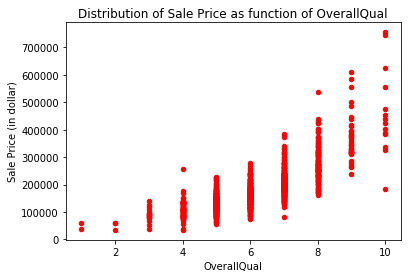

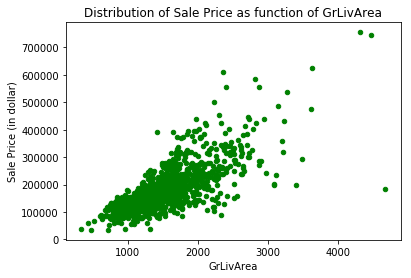

In [6]:
df.plot(kind='scatter', x='OverallQual',y='SalePrice', color='red')
plt.title("Distribution of Sale Price as function of OverallQual")
plt.ylabel("Sale Price (in dollar)")

df.plot(kind='scatter', x='GrLivArea',y='SalePrice', color='green')
plt.title("Distribution of Sale Price as function of GrLivArea")
plt.ylabel("Sale Price (in dollar)")
plt.show()

# <span style="color:green; font-family:Georgia; font-size:1.5em;">4. Regression Lineaire Simple (Python) </span>


In [7]:
def betas(X, Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    m = len(X)
    numer = 0
    denom = 0
    for i in range(m):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)
    print('b1 ', b1, 'b0 ', b0)
    return b0, b1
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return ssreg / sstot

In [8]:
x1=houses_train['OverallQual'].values
x2=houses_train['GrLivArea'].values
y=houses_train['SalePrice'].values
print('for OverallQual')
b10, b11 = betas(x1,y)
print('R2', polyfit(x1,y,2))
print('for GrLivArea')
b20, b21 = betas(x2,y)
print('R2', polyfit(x2,y,2))

for OverallQual
('b1 ', 46303.34708089103, 'b0 ', -101320.72837888583)
('R2', 0.6841716747559347)
for GrLivArea
('b1 ', 116.00632465557484, 'b0 ', 6379.277919203334)
('R2', 0.5484797904322916)


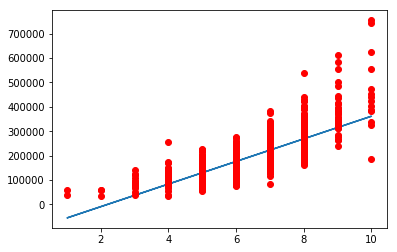

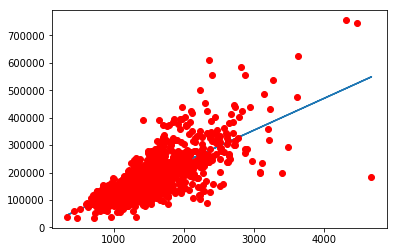

In [9]:
predict1=[]
predict2=[]

for d in x1:
    predict1.append(b10+b11*d)

for d in x2:
    predict2.append(b20+b21*d)

plt.plot(x1, predict1, x1, y, 'ro')
plt.show()

plt.plot(x2, predict2, x2, y, 'ro')
plt.show()



# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Evaluation du  modèle (RMSE)
  </span>


<span style="font-family:Georgia; font-size:1.2em;">La  racine  carrée  de l’erreur quadratique moyenne (RMSE) est une   autre  mesure  des  erreurs  de  prévision. La RMSE est définie par : $ RMSE = \sqrt{ \frac{1}{n} \sum (pred - y)^{2}} $.
</span>

<span style="font-family:Georgia; font-size:1.2em;">
Cette  mesure  pénalise  d'avantage  les  erreurs  importantes 
</span>

In [10]:
def rmse(pred, y):
    return np.sqrt(np.mean((pred-y)**2))
monrmse1=rmse(predict1, y)
monrmse2=rmse(predict2, y)
print('my RMSEs: ', monrmse1, monrmse2)

('my RMSEs: ', 49760.24223694321, 54492.33057795969)


# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Pour aller plus loin </span>

<span style="font-family:Georgia; font-size:1.2em;">  
La standardisation des données consiste à centrer-réduire la matrice de fonctions caractéristiques  $X$ en retranchant pour chaque vecteur $X^{j}, j \in [1, N]$ sa moyenne et en divisant par son écart-type.
</span>


<span style="font-family:Georgia; font-size:1.2em;">
La formule d’usage est alors : $ ~~~~~~~~~~~  \forall j \in [1, N] ~~~~ X^{j} = \frac{X^{j}_{std} - \mu_{j}}{ \sigma^{2}_{j}}$

</span>

In [11]:
## Vos remarques !!

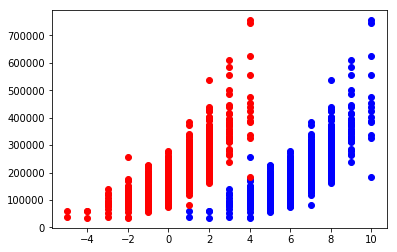

In [42]:
# Todo :
##  refaire le calcul des paramètres après un prétraitement sur les données d'apprentissage
##  1.  Centrer la variable --> soustraire son espérance à chacune de ses valeurs initiales
##  2.  Réduire la variable --> diviser toutes ses valeurs par son écart type.
## --------------------------
##    Soient  μ  l’espérance et σ l’écart-type des valeurs d’une variable aléatoire.
##    Centrer-réduire l’une de ses valeurs V revient alors à calculer : 
##          (V - μ ) / σ 
## --------------------------
##  3. re-éstimer les paramètre de modèle 
##  4. re-calculer la précision du modèle sur les données de test.
xnew1=[]
xnew2=[]
matexc=0
n=0
ecart=0
for d in x1:
    matexc+=d
    n+=1
matexc/=n
for d in x1:
    ecart+=(d-matexc)**2
ecart/=n
for d in x1:
    xnew1.append((d-matexc)/ecart)
for d in x2:
    xnew2.append((d-matexc)/ecart)   
#print(xnew)
plt.plot(x1, y, 'bo', xnew1, y, 'ro')
plt.show()

# <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>